In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 

In [2]:
plotly.tools.set_credentials_file(username='jmlegge', api_key='ktOXZnC3fY7bst32yyBy')

In [3]:
# The path to our CSV file
file = "GVA_data.csv"

# Read Main Gun violence CSV
df = pd.read_csv(file, low_memory=False)
df.head()

,Year,Month,Population,mass_shooting,officer_involved,home_invasion,armed_robbery,accidental,non-shooting,shots_fired,...,participant_status,participant_type,sources,state_house_district,state_senate_district,n_handgun,n_long_gun,n_multiple,lawtotal,F1
0,2016,3/1/2016,1830929,False,False,False,False,False,False,True,...,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wvnstv.com/story/31454745/greenbrie...,42.0,10.0,9481,6336,470,18.0,116059
1,2014,8/1/2014,1849467,False,False,False,False,False,False,False,...,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.wvnstv.com/story/26441941/doctor-ar...,42.0,10.0,5236,5986,380,24.0,34246
2,2015,8/1/2015,1841996,False,False,False,False,False,False,True,...,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wvnstv.com/story/29807924/an-alterc...,32.0,10.0,5565,5742,431,24.0,85314
3,2015,3/1/2015,1841996,False,False,False,False,False,False,True,...,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wvnstv.com/story/28615930/shots-rin...,32.0,10.0,9314,6894,503,24.0,62537
4,2015,12/1/2015,1841996,False,False,False,False,False,True,False,...,0::Unharmed||1::Unharmed,0::Subject-Suspect||1::Subject-Suspect,http://www.wvnstv.com/story/30677481/police-ar...,32.0,10.0,15080,13869,651,24.0,102070


In [4]:
df.columns

Index(['Year', 'Month', 'Population', 'mass_shooting', 'officer_involved',
       'home_invasion', 'armed_robbery', 'accidental', 'non-shooting',
       'shots_fired', 'total_casualties', 'shotgun', 'rifle', 'handgun',
       'incident_characteristics_tertiary',
       'incident_characteristics_secondary',
       'incident_characteristics _primary', 'incident_id', 'date', 'state',
       'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url',
       'source_url', 'incident_url_fields_missing', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'n_handgun', 'n_long_gun', 'n_multiple',
       'lawtotal', 'F1'],
     

In [5]:
#Limit Data to 2017
State_df = df.loc[:, ["state", "Year"]]
State_df = State_df[State_df['Year'] == 2017]
State_df.head()

,state,Year
713,Florida,2017
714,Florida,2017
715,Florida,2017
716,Florida,2017
717,Florida,2017


In [6]:
#Count number of incidents by state
State_gb_df = State_df.groupby(['state']).count()
State_gb_df.columns = ['num_of_incidents']
State_gb_df.head()

,num_of_incidents
state,
Alabama,1461
Alaska,317
Arizona,587
Arkansas,820
California,4588


In [7]:
#Calculate total incidents in 2017
Total = State_gb_df['num_of_incidents'].sum()
Total

61401

In [8]:
#Calculate percent of total for incidents by state
Percent_of_total=State_gb_df["num_of_incidents"]/Total
Percent_of_total = Percent_of_total*100
Percent_of_total

state
Alabama                 2.379440
Alaska                  0.516278
Arizona                 0.956010
Arkansas                1.335483
California              7.472191
Colorado                1.317568
Connecticut             1.270338
Delaware                0.633540
District of Columbia    1.859905
Florida                 6.768619
Georgia                 3.247504
Hawaii                  0.110747
Idaho                   0.265468
Illinois                8.288139
Indiana                 2.415270
Iowa                    0.954382
Kansas                  0.941353
Kentucky                1.677497
Louisiana               3.236104
Maine                   0.330614
Maryland                2.571619
Massachusetts           2.868031
Michigan                2.214948
Minnesota               1.236136
Mississippi             1.675868
Missouri                2.817544
Montana                 0.271983
Nebraska                0.714972
Nevada                  0.711715
New Hampshire           0.335499
New 

In [9]:
# Add percent of total per state to df and round to 2 decimals 
State_gb_df['Percent_of_total_inc'] = Percent_of_total.round(2)
State_gb_df.head()

,num_of_incidents,Percent_of_total_inc
state,,
Alabama,1461,2.38
Alaska,317,0.52
Arizona,587,0.96
Arkansas,820,1.34
California,4588,7.47


In [10]:
#Read registered weapons in 2017 CSV
# The path to our CSV file
file = "reg_weapons.csv"

df_2 = pd.read_csv(file)
df_2 = df_2[['state', 'Total']]
df_2.head()

,state,Total
0,Alabama,161641
1,Alaska,15824
2,Arkansas,79841
3,Arizona,179738
4,California,344622


In [11]:
#Add total registered firearms to insident dataframe
merged_df = pd.merge(State_gb_df, df_2, on="state")
merged_df = merged_df.rename(columns={'Total': 'Total_registered'})
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered
0,Alabama,1461,2.38,161641
1,Alaska,317,0.52,15824
2,Arizona,587,0.96,179738
3,Arkansas,820,1.34,79841
4,California,4588,7.47,344622


In [12]:
#Calculate total registered Firearms 
Total_firearms = merged_df['Total_registered'].sum()
Total_firearms

5202818

In [13]:
#Calculate percent of registered firearms by state
Percent_of_reg_firearms = merged_df["Total_registered"]/Total_firearms
Percent_of_reg_firearms = Percent_of_reg_firearms*100
Percent_of_reg_firearms

0      3.106797
1      0.304143
2      3.454628
3      1.534572
4      6.623757
5      1.776633
6      1.583757
7      0.093257
8      0.907739
9      6.598117
10     3.652828
11     0.151053
12     0.952676
13     2.815532
14     2.191485
15     0.547665
16     1.011644
17     1.558156
18     2.245533
19     0.295436
20     1.981791
21     0.714075
22     1.263584
23     1.524309
24     0.682207
25     1.403009
26     0.425404
27     0.427345
28     1.477815
29     1.232697
30     1.105305
31     1.875522
32     1.464725
33     2.926068
34     0.255093
35     3.332905
36     1.369815
37     1.179803
38     4.543249
39     0.081168
40     2.029689
41     0.406126
42     1.905871
43    11.314945
44     1.400318
45     0.112862
46     5.916448
47     1.765101
48     0.677787
49     1.246978
50     2.552578
Name: Total_registered, dtype: float64

In [14]:
# Add percent of total firearms per state to main df and round to 2 decimals 
merged_df['Percent_of_reg_firearms'] = Percent_of_reg_firearms.round(2)
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms
0,Alabama,1461,2.38,161641,3.11
1,Alaska,317,0.52,15824,0.30
2,Arizona,587,0.96,179738,3.45
3,Arkansas,820,1.34,79841,1.53
4,California,4588,7.47,344622,6.62


In [15]:
#Read unique state population values for 2017
df_3 = df.loc[:, ["state", "Year", "Population"]]
df_3 = df_3[df_3['Year'] == 2017]
df_3 = df_3.drop_duplicates(['state'])
df_3.head()

,state,Year,Population
713,Florida,2017,20976812
1836,Alabama,2017,4875120
1838,Alaska,2017,739786
1844,Kentucky,2017,4453874
1845,North Carolina,2017,10270800


In [16]:
Total_Population = df_3['Population'].sum()
Total_Population

325147121

In [17]:
Percent_of_Total_Population  = df_3["Population"]/Total_Population
Percent_of_Total_Population  = Percent_of_Total_Population*100
Percent_of_Total_Population 

713      6.451483
1836     1.499358
1838     0.227523
1844     1.369803
1845     3.158816
1846     2.283715
1847     1.099158
1848    12.117391
1849     1.878722
1850     3.202567
1852     0.919480
1854     1.209496
1855     0.923581
1856     3.933741
1857     2.048329
1858     1.712503
1859     2.167904
1861     0.895191
1864     1.727188
1869     3.587339
1873     1.275297
1874     0.558839
1875     2.603501
2411     0.294352
2415     0.213962
2498     0.528654
2500     3.932434
2515     0.966835
3036     1.436524
3039     1.781363
3041     0.914172
3046     1.852974
3048     6.025186
3060     2.063310
3065     8.710739
3080     0.643830
3091     0.268582
3094     1.544291
4154     0.410603
4171     2.110812
4204     3.068287
4229     0.323881
4230     0.589756
4234     0.415125
4237     2.733699
4291     0.232257
4325     0.324926
5624     0.178053
5725     0.438018
5853     0.954374
5854     0.192075
Name: Population, dtype: float64

In [18]:
# Add percent of total population per state to main df and round to 2 decimals 
df_3['Percent_of_pop'] = Percent_of_Total_Population.round(2)
df_3.head()

,state,Year,Population,Percent_of_pop
713,Florida,2017,20976812,6.45
1836,Alabama,2017,4875120,1.50
1838,Alaska,2017,739786,0.23
1844,Kentucky,2017,4453874,1.37
1845,North Carolina,2017,10270800,3.16


In [19]:
#Merge population values 
merged_df = pd.merge(merged_df, df_3, on="state")
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop
0,Alabama,1461,2.38,161641,3.11,2017,4875120,1.50
1,Alaska,317,0.52,15824,0.30,2017,739786,0.23
2,Arizona,587,0.96,179738,3.45,2017,7048876,2.17
3,Arkansas,820,1.34,79841,1.53,2017,3002997,0.92
4,California,4588,7.47,344622,6.62,2017,39399349,12.12


In [20]:
merged_df = merged_df.sort_values(by=['num_of_incidents'], ascending=False)
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop
13,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93
4,California,4588,7.47,344622,6.62,2017,39399349,12.12
9,Florida,4156,6.77,343288,6.60,2017,20976812,6.45
43,Texas,2875,4.68,588696,11.31,2017,28322717,8.71
35,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59


In [21]:
#Read total firearms est file 
# The path to our CSV file
file_est = "gun_ownership_est.csv"

total_guns = pd.read_csv(file_est)
total_guns.head()

,state,gun_ownership_rate
0,Alabama,48.9
1,Alaska,61.7
2,Arizona,32.3
3,Arkansas,57.9
4,California,19.8


In [22]:
merged_df = pd.merge(merged_df, total_guns, on="state")
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7
4,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59,19.6


In [23]:
gun_rate_dec = merged_df['gun_ownership_rate']/100
est_gun_owners = (merged_df['Population']*gun_rate_dec).round(0).astype(int)
est_gun_owners

0      3349983
1      7801071
2      6817464
3     10111210
4      2286169
5      3466211
6      2947720
7      2017844
8      3290525
9      2078514
10     2643265
11     1551094
12     1655434
13     2229421
14     1247152
15     2251108
16     2480306
17     2383934
18     2009842
19     2873217
20     1004405
21      180184
22     1888443
23     1279576
24     2056845
25     1226984
26     1738735
27     1926254
28      593264
29     2043513
30     2276787
31     1062549
32      937242
33     1102993
34     1044604
35      379680
36     1114652
37      984840
38       49768
39      456448
40      989895
41      194366
42      301724
43      305650
44       61276
45      550766
46      978056
47      361729
48      311466
49      179863
50      642316
dtype: int32

In [24]:
merged_df['est_gun_owners_by_state'] = est_gun_owners
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2,3349983
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8,7801071
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5,6817464
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7,10111210
4,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59,19.6,2286169


In [25]:
Total_gun_owners_est = merged_df['est_gun_owners_by_state'].sum()
Total_gun_owners_est

93716357

In [26]:
Percent_of_Total_gun_owners_est  = merged_df["est_gun_owners_by_state"]/Total_gun_owners_est
Percent_of_Total_gun_owners_est  = Percent_of_Total_gun_owners_est*100
Percent_of_Total_gun_owners_est

0      3.574598
1      8.324130
2      7.274572
3     10.789162
4      2.439456
5      3.698619
6      3.145363
7      2.153140
8      3.511153
9      2.217878
10     2.820495
11     1.655094
12     1.766430
13     2.378903
14     1.330773
15     2.402044
16     2.646609
17     2.543776
18     2.144601
19     3.065865
20     1.071750
21     0.192265
22     2.015062
23     1.365371
24     2.194756
25     1.309253
26     1.855316
27     2.055409
28     0.633042
29     2.180530
30     2.429445
31     1.133792
32     1.000084
33     1.176948
34     1.114644
35     0.405137
36     1.189389
37     1.050873
38     0.053105
39     0.487053
40     1.056267
41     0.207398
42     0.321954
43     0.326144
44     0.065385
45     0.587695
46     1.043634
47     0.385983
48     0.332350
49     0.191923
50     0.685383
Name: est_gun_owners_by_state, dtype: float64

In [27]:
merged_df['est_gun_owners_by_state_percent_of_total'] = Percent_of_Total_gun_owners_est
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state,est_gun_owners_by_state_percent_of_total
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2,3349983,3.574598
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8,7801071,8.324130
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5,6817464,7.274572
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7,10111210,10.789162
4,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59,19.6,2286169,2.439456


In [39]:
merged_df = merged_df.sort_values(by=['num_of_incidents'], ascending=False)
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state,est_gun_owners_by_state_percent_of_total,code,reg_firearm_per_1000_people,text
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2,3349983,3.574598,IL,11.46,Illinois<br>Population 12786196<br>EST Gun Own...
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8,7801071,8.324130,CA,8.75,California<br>Population 39399349<br>EST Gun O...
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5,6817464,7.274572,FL,16.37,Florida<br>Population 20976812<br>EST Gun Owne...
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7,10111210,10.789162,TX,20.79,Texas<br>Population 28322717<br>EST Gun Owners...
4,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59,19.6,2286169,2.439456,OH,14.87,Ohio<br>Population 11664129<br>EST Gun Owners ...


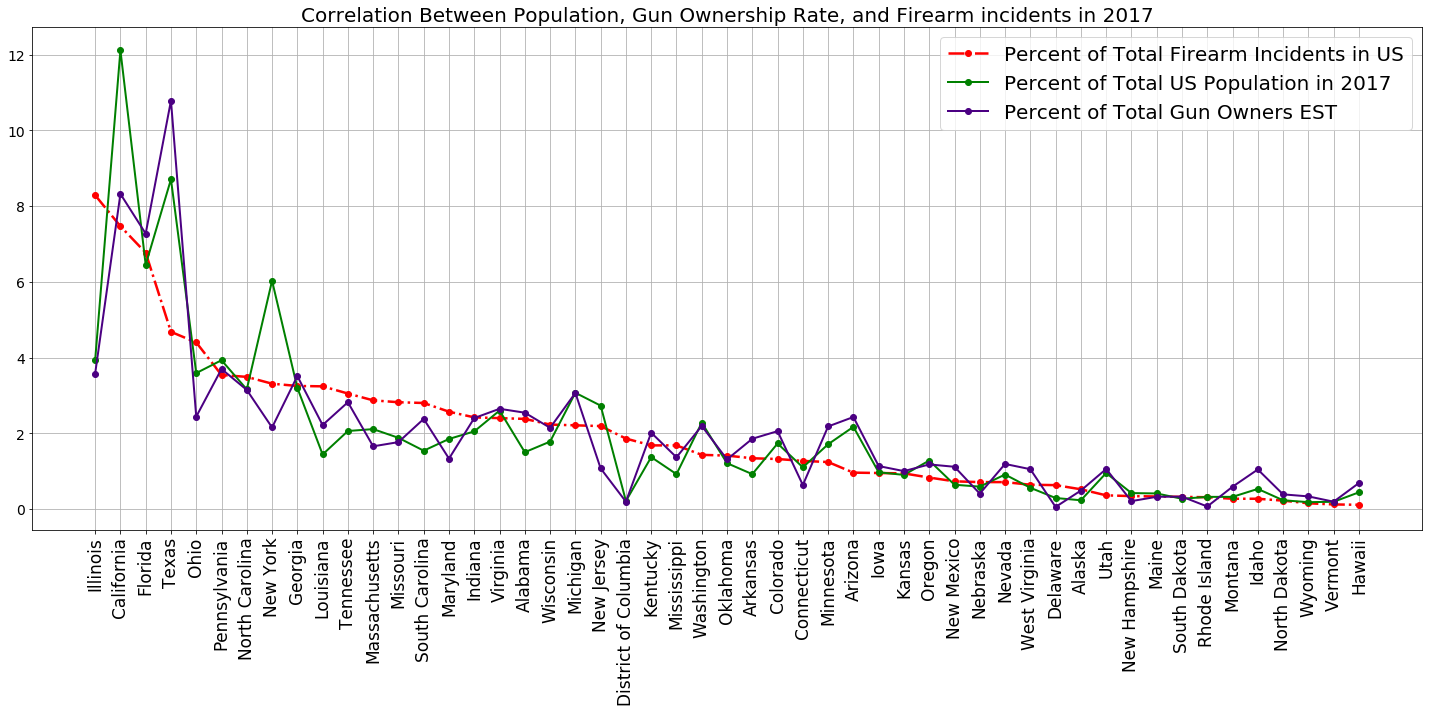

In [43]:
y = merged_df['Percent_of_total_inc']
y2 = merged_df['Percent_of_reg_firearms']
y3 = merged_df['Percent_of_pop']
y4 = merged_df['est_gun_owners_by_state_percent_of_total']
x = merged_df['state']

plt.figure(figsize=(20,10))

plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=14)

plt.plot(x, y, linewidth=2.5, linestyle= "-.", marker = "o", color = "red", label = "Percent of Total Firearm Incidents in US")
# plt.plot(x, y2, linewidth=2.0, marker = "o", color = "indigo", label = "Percent of Registered Firearms in US")
plt.plot(x, y3, linewidth=2.0, marker = "o", color = "green", label = "Percent of Total US Population in 2017")
plt.plot(x, y4, linewidth=2.0, marker = "o", color = "indigo", label = "Percent of Total Gun Owners EST")

plt.grid(True)

plt.legend(prop={'size': 20})
plt.title("Correlation Between Population, Gun Ownership Rate, and Firearm incidents in 2017", fontsize = 20)
plt.tight_layout()

plt.savefig('line_graph.png')
plt.show()

In [30]:
#Read state codes CSV
# The path to our CSV file
file = "state_code.csv"

state_codes = pd.read_csv(file)
state_codes = state_codes[['state', 'code']]
state_codes.head()

,state,code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [31]:
merged_df = pd.merge(merged_df, state_codes, on="state")
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state,est_gun_owners_by_state_percent_of_total,code
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2,3349983,3.574598,IL
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8,7801071,8.324130,CA
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5,6817464,7.274572,FL
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7,10111210,10.789162,TX
4,Ohio,2701,4.40,173405,3.33,2017,11664129,3.59,19.6,2286169,2.439456,OH


In [32]:
reg_firearm_per_1000residents = merged_df["Total_registered"]/(merged_df["Population"]/1000)
# merged_df[Reg_firearm_per_person] = Reg_firearm_per_person
# merged_df.head()
reg_firearm_per_1000residents

0      11.456652
1       8.746896
2      16.365118
3      20.785294
4      14.866519
5      18.480746
6      14.822409
7       3.889954
8      18.251128
9      25.012963
10     14.780451
11      5.413182
12     11.949687
13     21.030949
14     17.113837
15     17.119759
16     36.363198
17     33.156312
18     11.201214
19      6.589721
20      6.469789
21     67.886461
22     18.201682
23     11.872241
24     12.367631
25     18.122432
26     26.587106
27     16.459511
28     23.056174
29     14.242958
30     25.498817
31      9.064024
32     18.083004
33     14.803241
34     46.613277
35     11.594853
36     25.867269
37     19.407302
38      5.069597
39     21.389970
40     23.478321
41     47.515608
42     11.513314
43     24.195968
44      3.997213
45     21.017197
46     28.835816
47     17.574711
48    229.397479
49      9.402346
50      5.518174
dtype: float64

In [33]:
merged_df['reg_firearm_per_1000_people'] = reg_firearm_per_1000residents.round(2)
merged_df = merged_df.sort_values(by=['reg_firearm_per_1000_people'], ascending=False)
merged_df.head()


,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state,est_gun_owners_by_state_percent_of_total,code,reg_firearm_per_1000_people
48,Wyoming,91,0.15,132806,2.55,2017,578934,0.18,53.8,311466,0.332350,WY,229.40
21,District of Columbia,1142,1.86,47228,0.91,2017,695691,0.21,25.9,180184,0.192265,DC,67.89
41,New Hampshire,206,0.34,64135,1.23,2017,1349767,0.42,14.4,194366,0.207398,NH,47.52
34,New Mexico,448,0.73,97580,1.88,2017,2093395,0.64,49.9,1044604,1.114644,NM,46.61
16,Virginia,1473,2.40,307822,5.92,2017,8465207,2.60,29.3,2480306,2.646609,VA,36.36


In [68]:
scl = [[0.0, 'rgb(26, 152, 80)'],\
            [.50, 'rgb(254, 224, 139)'],[1.0, 'rgb(215, 48, 39)']]

merged_df['text'] = merged_df['state'] + '<br>' +\
    'Population '+ merged_df['Population'].astype(str)+ '<br>' +\
    'EST Gun Owners '+ merged_df['est_gun_owners_by_state'].astype(str)
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = merged_df['code'],
        z = merged_df['gun_ownership_rate'].astype(float),
        locationmode = 'USA-states',
        text = merged_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percent of" + '<br>' + "Gun Owners")
        ) ]

layout = dict(
        title = 'Percent of State Population That Are Gun Owners<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot(fig, file= 'plotly_map')



In [69]:
plot_url = py.plot(fig, height=1000, width=1000, auto_open=False,\
                          filename='plotly_map')
print(plot_url)

https://plot.ly/~jmlegge/80


In [64]:
merged_df = merged_df.sort_values(by=['est_gun_owners_by_state'], ascending=False)
merged_df.head()

,state,num_of_incidents,Percent_of_total_inc,Total_registered,Percent_of_reg_firearms,Year,Population,Percent_of_pop,gun_ownership_rate,est_gun_owners_by_state,est_gun_owners_by_state_percent_of_total,code,reg_firearm_per_1000_people,text
3,Texas,2875,4.68,588696,11.31,2017,28322717,8.71,35.7,10111210,10.789162,TX,20.79,Texas<br>Population 28322717<br>EST Gun Owners...
1,California,4588,7.47,344622,6.62,2017,39399349,12.12,19.8,7801071,8.324130,CA,8.75,California<br>Population 39399349<br>EST Gun O...
2,Florida,4156,6.77,343288,6.60,2017,20976812,6.45,32.5,6817464,7.274572,FL,16.37,Florida<br>Population 20976812<br>EST Gun Owne...
5,Pennsylvania,2172,3.54,236377,4.54,2017,12790447,3.93,27.1,3466211,3.698619,PA,18.48,Pennsylvania<br>Population 12790447<br>EST Gun...
0,Illinois,5089,8.29,146487,2.82,2017,12786196,3.93,26.2,3349983,3.574598,IL,11.46,Illinois<br>Population 12786196<br>EST Gun Own...


In [71]:

Total_registered_2017 = merged_df['Total_registered'].tolist()
est_gun_owners_by_state = merged_df['est_gun_owners_by_state'].tolist()
state = merged_df['code'].tolist()

trace1 = go.Bar(
    x= state,
    y= Total_registered_2017,
    name='NFA Registered Weapons'
)
trace2 = go.Bar(
    x= state,
    y= est_gun_owners_by_state,
    name='EST Gun Owners'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [72]:
plot_url = py.plot(fig, height=1000, width=1000, auto_open=False,\
                          filename='grouped-bar')
print(plot_url)

https://plot.ly/~jmlegge/84
